In [132]:
import pandas as pd
df = pd.read_csv('sentiment.csv', delimiter=',')
#df = df['tweet']

In [133]:
import matplotlib
import matplotlib.pyplot as plt

In [134]:
pip install emot

Note: you may need to restart the kernel to use updated packages.


In [135]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\I068230\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [136]:
#df.drop(columns=['Unnamed'])
df.head(20)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,NaN,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0
5,5,2022-11-01 23:59:59+00:00,1587595339024203777,https://twitter.com/porscheFanNYC/status/15875...,porscheFanNYC,Twitter for Android,Urdak,@MSNBC You really should just call yourself MS...,28,4
6,6,2022-11-01 23:59:59+00:00,1587595338684284928,https://twitter.com/msalup/status/158759533868...,msalup,Twitter for Android,Miami,The #Democrats had a strategy???? \n\nTop Demo...,0,0
7,7,2022-11-01 23:59:59+00:00,1587595337996591104,https://twitter.com/levan_roy/status/158759533...,levan_roy,Twitter for iPhone,NaN,@StockOpps @EvanMcMullin @SenMikeLee has our n...,2,0
8,8,2022-11-01 23:59:59+00:00,1587595337933672450,https://twitter.com/AlwaysLiveTruth/status/158...,AlwaysLiveTruth,Twitter for iPhone,Resting in HIS Sacred Heart,@0liviajulianna @MomsAGAbbott Democrats health...,0,0
9,9,2022-11-01 23:59:59+00:00,1587595337086402561,https://twitter.com/LAWDOG2929/status/15875953...,LAWDOG2929,Twitter for iPhone,United States,@POTUS No they don’t. That’s a lie. That’s an ...,2,0


In [139]:
df.location.isna().sum()
df['location'] = df['location'].fillna('Unknown')

In [140]:
words = set(nltk.corpus.words.words())

In [141]:
eng_stopwords = []
with open('stopwords.txt','r') as file:    
      for line in file:         
          for sw in line.split():            
              eng_stopwords.append(sw)
emoji = list(UNICODE_EMOJI.keys())

In [142]:
def ProcessedTweets(text):
 #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)
    #check for stopwords, remove them
    filtered_words = [w for w in tokens if w not in eng_stopwords]
    #remove emoji
    filtered_words = [w for w in filtered_words if w not in emoji]
    #also removed the words not in NLTK words dictionary of set(nltk.corpus.words.words())
    filtered_words1 = [w2 for w2 in filtered_words if w2 in words or w2 in {'democrats', 'dem', 'dems'}]
    #check for synonyms using wordnet 
    
    # lemmetizing words
    #lemmatizer = WordNetLemmatizer() 
    #lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    #text = " ".join(lemma_words)
    
    text = " ".join(filtered_words1) #without wordnet and lemmatizing
    return text

In [143]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#decide the polarity of sentiments using this textblob function, difficult to do it for 20,000 tweets manually.
def sentimenttextblob(polarity):
    if polarity < 0:
        return -1 
        #"Negative"
    elif polarity == 0:
        return 0 
        #"Neutral"
    else:
        return 1 
        #"Positive" 

In [159]:
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets)

In [22]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sentiments = df['Sentiment'].value_counts()
sentiments

 0    11191
 1     5968
-1     2842
Name: tweet, dtype: int64

In [155]:
df.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2022-11-01 23:59:59+00:00,1587595340760457218,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0
1,1,2022-11-01 23:59:59+00:00,1587595340458463233,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1
2,2,2022-11-01 23:59:59+00:00,1587595339992731649,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0
3,3,2022-11-01 23:59:59+00:00,1587595339783360513,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0
4,4,2022-11-01 23:59:59+00:00,1587595339653173258,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0


In [131]:
df['Sentiment'],df['Processed_Tweets']

(0        0
 1        0
 2        1
 3        0
 4        1
         ..
 19996    1
 19997    0
 19998    0
 19999    0
 20000    0
 Name: tweet, Length: 20001, dtype: int64,
 0                                              always spot
 1        majority dont head house marc army vet patriot...
 2        vote chance give exposure social media dont fo...
 3                                                 get vote
 4                         thanks democrats ruin everything
                                ...                        
 19996               join supporting bold democrats pac via
 19997    con cruelty chaos strategy passing substantive...
 19998                                b vote celebrity year
 19999                               understand people vote
 20000                                    next week den dem
 Name: tweet, Length: 20001, dtype: object)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [ ]:
#CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample 
#from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular 
#text sample
#how many times given words were found in the document.
#sparse matrix

#document[0]	0	0	0	1	1	0	0	1	0	1	0	1
#document[1]	0	0	1	0	2	0	1	0	0	0	0	1
#document[2]	1	1	0	1	1	1	0	1	1	0	1	0

In [104]:
#Initializing lists to be used in plotting later.
accuracy_ngrams = []
recall_ngrams = []
precion_ngrams = []
f1_ngrams = []

In [105]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [106]:
def naivebayesCV():
    #training and testing feature vectors
    
    for n in [1,2,3,5]:
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        cv = CountVectorizer(stop_words='english',ngram_range = (n,n), tokenizer = token.tokenize)
        text_counts = cv.fit_transform(df['Processed_Tweets'])

        X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.25, random_state=5)

        MNB = MultinomialNB()
        MNB.fit(X_train, Y_train)
        
        predicted = MNB.predict(X_test)
        
        accuracy_score = (metrics.accuracy_score(y_test,predicted))
        accuracy_score = (round(accuracy_score,2))*100
        accuracy_ngrams.append(accuracy_score)

        precision = (metrics.precision_score(y_test, predicted, average='macro'))
        precision = (round(precision,2))*100
        precion_ngrams.append(precision)

        recall = (metrics.recall_score(y_test, predicted, average='macro'))
        recall = (round(recall,2))*100
        recall_ngrams.append(recall)

        f1 = (metrics.f1_score(y_test, predicted, average='macro'))
        f1 = (round(f1,2))*100
        f1_ngrams.append(f1)

        #print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        #print(confusion_mat)
        #print("\nClassification Report for k = {} is:\n".format(k))
        #print(class_report)
        print("Accuracy Score for ngrams = {0} is: {1}%".format(n,accuracy_score))
        print("Recall for ngrams = {0} is: {1}%".format(n,recall))
        print("Precision for ngrams = {0} is: {1}%".format(n,precision))
        print("F1-score for ngrams = {0} is: {1}%".format(n,f1))

In [107]:
naivebayesCV()

Accuracy Score for ngrams = 1 is: 82.0%
Recall for ngrams = 1 is: 78.0%
Precision for ngrams = 1 is: 78.0%
F1-score for ngrams = 1 is: 78.0%
Accuracy Score for ngrams = 2 is: 70.0%
Recall for ngrams = 2 is: 55.00000000000001%
Precision for ngrams = 2 is: 68.0%
F1-score for ngrams = 2 is: 56.99999999999999%
Accuracy Score for ngrams = 3 is: 63.0%
Recall for ngrams = 3 is: 41.0%
Precision for ngrams = 3 is: 76.0%
F1-score for ngrams = 3 is: 39.0%
Accuracy Score for ngrams = 5 is: 59.0%
Recall for ngrams = 5 is: 36.0%
Precision for ngrams = 5 is: 86.0%
F1-score for ngrams = 5 is: 30.0%


<function matplotlib.pyplot.show(close=None, block=None)>

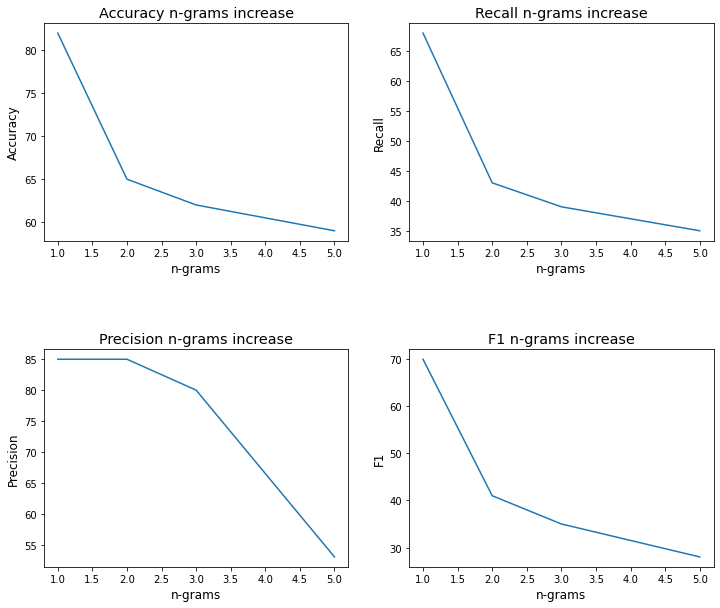

In [123]:
#print(accuracy_ngrams)
ngrams = [1,2,3,5] 

fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(ngrams, accuracy_ngrams)
plt.title("Accuracy n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(ngrams,recall_ngrams)
plt.title("Recall n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(ngrams,precion_ngrams)
plt.title("Precision n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(ngrams,f1_ngrams)
plt.title("F1 n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=0.5)

plt.show


In [116]:
accuracy_ngrams = []
recall_ngrams = []
precion_ngrams = []
f1_ngrams = []

In [117]:
def naivebayesTFIDF():
    #training and testing feature vectors
    
    for n in [1,2,3,5]:
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        tfidf = TfidfVectorizer(stop_words='english',ngram_range = (n,n), analyzer='word', use_idf=True)#tokenizer = token.tokenize)
        text_count2 = tfidf.fit_transform(df['Processed_Tweets'])

        X_train, X_test, Y_train, Y_test = train_test_split(text_count2, df['Sentiment'], test_size=0.25, random_state=5)

        MNB = MultinomialNB()
        MNB.fit(X_train, Y_train)
        
        predicted = MNB.predict(X_test)
        
        accuracy_score = (metrics.accuracy_score(y_test,predicted))
        accuracy_score = (round(accuracy_score,2))*100
        accuracy_ngrams.append(accuracy_score)

        precision = (metrics.precision_score(y_test, predicted, average='macro'))
        precision = (round(precision,2))*100
        precion_ngrams.append(precision)

        recall = (metrics.recall_score(y_test, predicted, average='macro'))
        recall = (round(recall,2))*100
        recall_ngrams.append(recall)

        f1 = (metrics.f1_score(y_test, predicted, average='macro'))
        f1 = (round(f1,2))*100
        f1_ngrams.append(f1)

        #print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        #print(confusion_mat)
        #print("\nClassification Report for k = {} is:\n".format(k))
        #print(class_report)
        print("Accuracy Score for ngrams = {0} is: {1}%".format(n,accuracy_score))
        print("Recall for ngrams = {0} is: {1}%".format(n,recall))
        print("Precision for ngrams = {0} is: {1}%".format(n,precision))
        print("F1-score for ngrams = {0} is: {1}%".format(n,f1))

In [118]:
naivebayesTFIDF()

Accuracy Score for ngrams = 1 is: 82.0%
Recall for ngrams = 1 is: 68.0%
Precision for ngrams = 1 is: 85.0%
F1-score for ngrams = 1 is: 70.0%
Accuracy Score for ngrams = 2 is: 65.0%
Recall for ngrams = 2 is: 43.0%
Precision for ngrams = 2 is: 85.0%
F1-score for ngrams = 2 is: 41.0%
Accuracy Score for ngrams = 3 is: 62.0%
Recall for ngrams = 3 is: 39.0%
Precision for ngrams = 3 is: 80.0%
F1-score for ngrams = 3 is: 35.0%
Accuracy Score for ngrams = 5 is: 59.0%
Recall for ngrams = 5 is: 35.0%
Precision for ngrams = 5 is: 53.0%
F1-score for ngrams = 5 is: 28.000000000000004%


C:\Users\I068230\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[82.0, 65.0, 62.0, 59.0]


<function matplotlib.pyplot.show(close=None, block=None)>

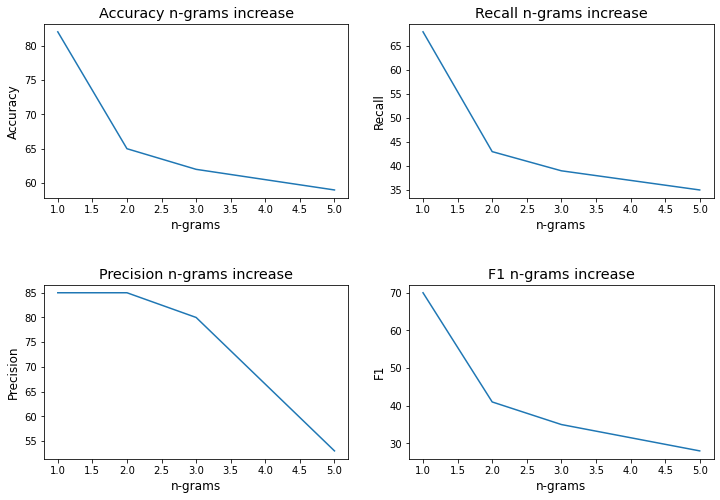

In [119]:
print(accuracy_ngrams)
ngrams = [1,2,3,5] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(ngrams, accuracy_ngrams)
plt.title("Accuracy n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(ngrams,recall_ngrams)
plt.title("Recall n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(ngrams,precion_ngrams)
plt.title("Precision n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(ngrams,f1_ngrams)
plt.title("F1 n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show
